In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from tqdm import tqdm

In [5]:
def to_supervised(train):
  window_size = 24
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

274/274 [==============================] - 2s 5ms/step
Y_tested (8760, 1)
Y_predicted (8760, 1)
PM2.5 (ug/m3) 9.230803527122788


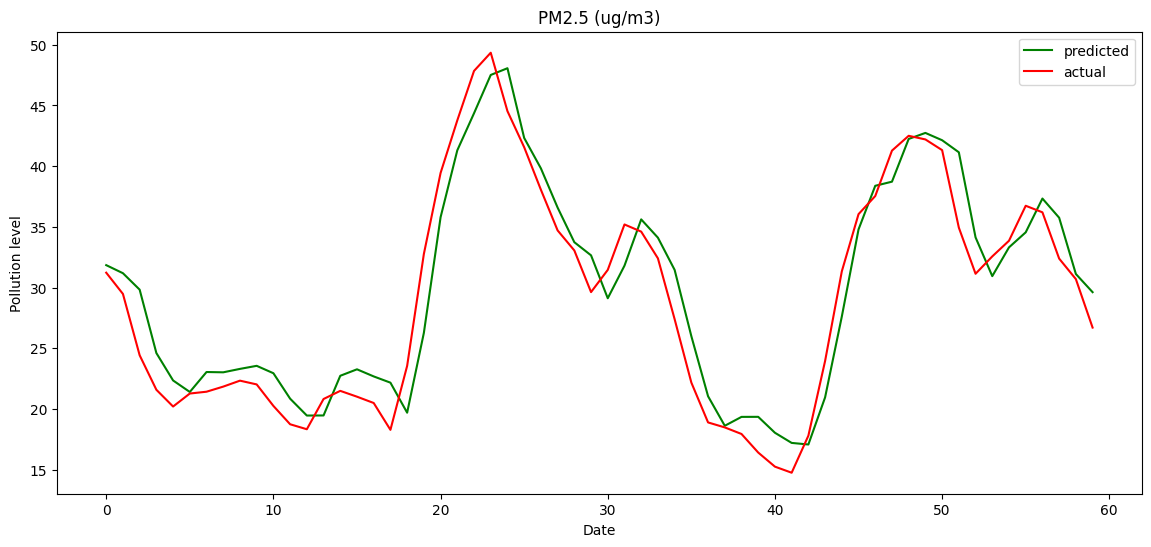

274/274 [==============================] - 2s 4ms/step
Y_tested (8760, 1)
Y_predicted (8760, 1)
PM10 (ug/m3) 16.777445644687948


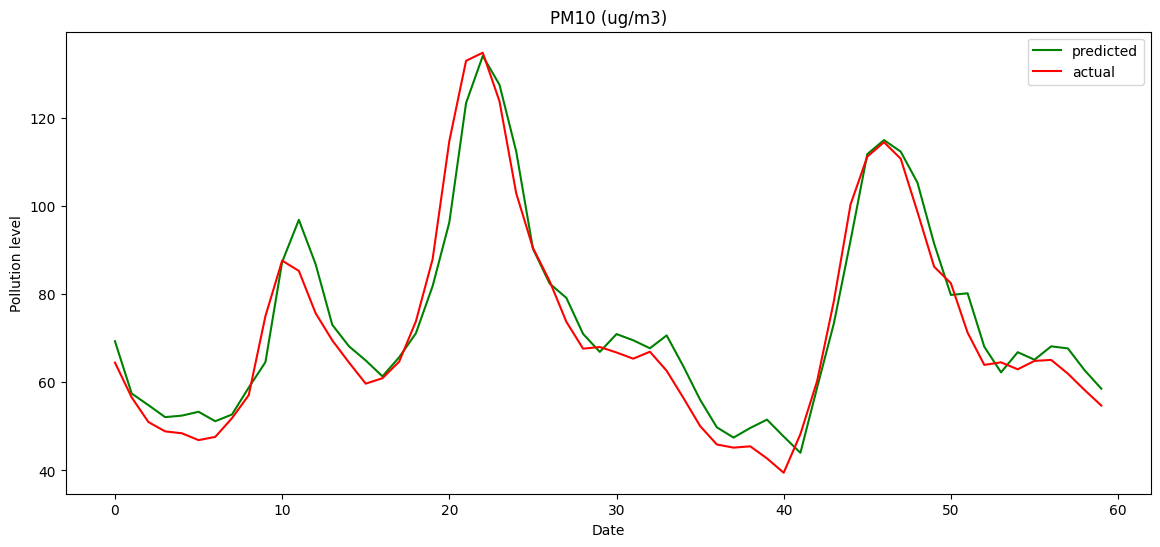

274/274 [==============================] - 2s 5ms/step
Y_tested (8760, 1)
Y_predicted (8760, 1)
SO2 (ug/m3) 10.102650995467242


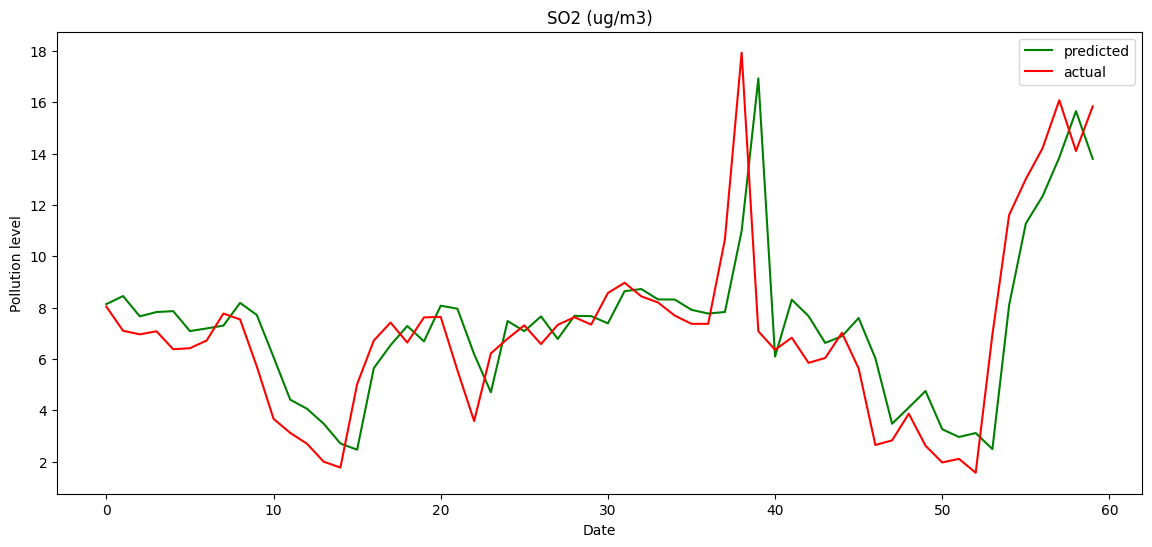

274/274 [==============================] - 2s 5ms/step
Y_tested (8760, 1)
Y_predicted (8760, 1)
CO (mg/m3) 0.17210007842708086


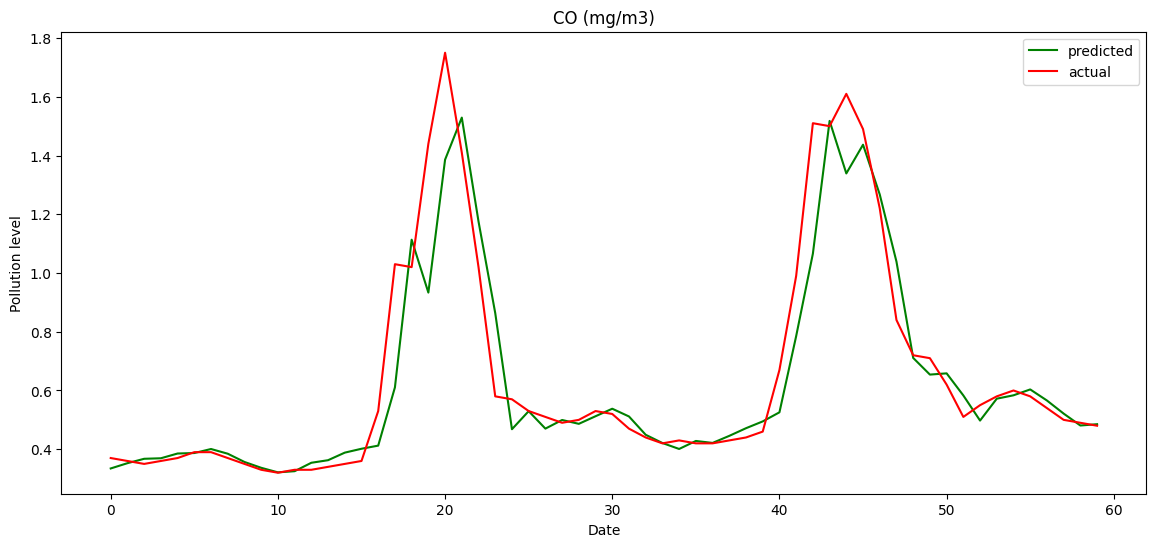

274/274 [==============================] - 2s 5ms/step
Y_tested (8760, 1)
Y_predicted (8760, 1)
Ozone (ug/m3) 4.91681155547649


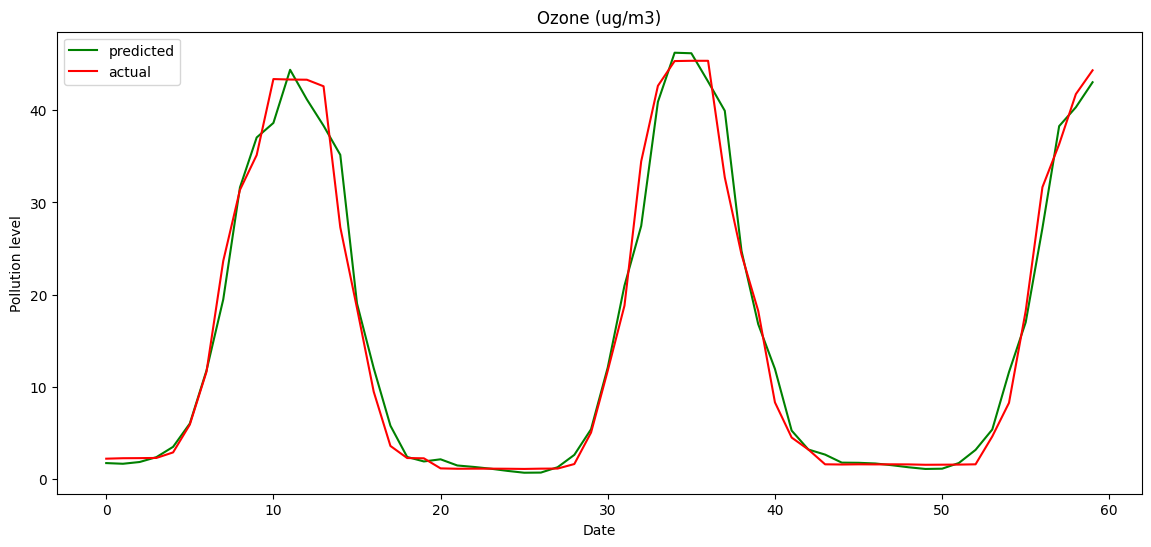

274/274 [==============================] - 2s 4ms/step
Y_tested (8760, 1)
Y_predicted (8760, 1)
NO2 (ug/m3) 3.4963986859766503


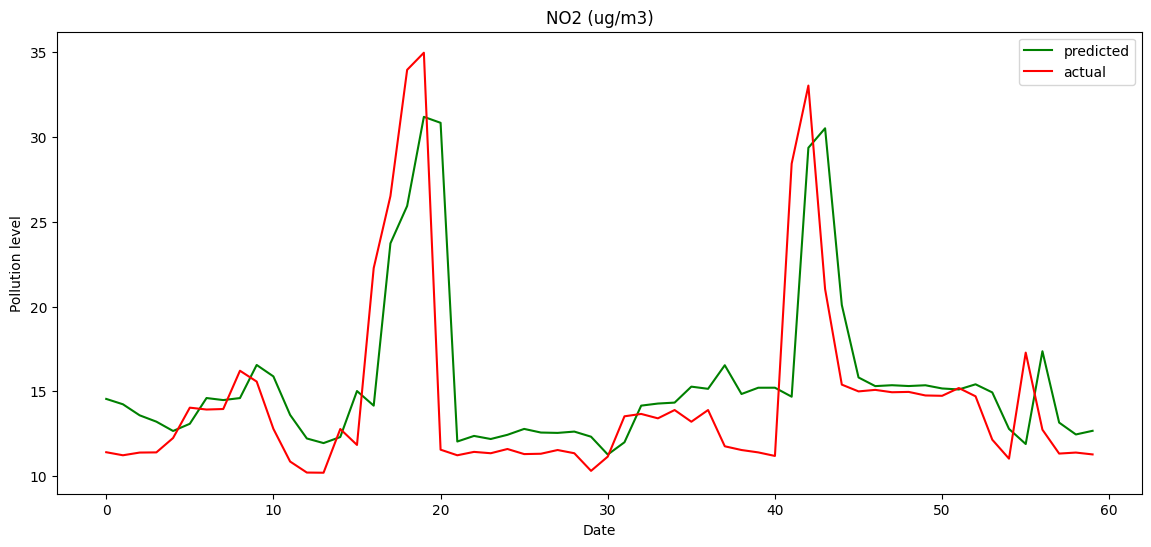

In [6]:
columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)','SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'NO2 (ug/m3)']
for i in columns:
    df = pd.read_csv('D:/python project/gandhinagar/data.csv')
    df = df[[i]]
    values = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataset = scaler.fit_transform(values)
    subs = i.split()[0]
    model = load_model(f'D:/python project/gandhinagar/model/model_{subs}.h5')

    X, Y = to_supervised(scaled_dataset)
    X = np.array(X)
    Y = np.array(Y)

    n_train = 24*365
    X_train, X_test = X[:-n_train, :], X[-n_train:, :]
    Y_train, Y_test = Y[:-n_train], Y[-n_train:]
    Y_pred = model.predict(X_test) 

    Y_predicted = scaler.inverse_transform(Y_pred)
    Y_tested = scaler.inverse_transform(Y_test)
    Y_predicted = Y_predicted[:,0:1]
    Y_tested = Y_tested[:,0:1]
    print('Y_tested', Y_tested.shape)
    print('Y_predicted', Y_predicted.shape)


    mse = mean_squared_error(Y_tested, Y_predicted)
    rmse = np.sqrt(mse)
    print(i,rmse)
    plt.figure(figsize=(14, 6))
    plt.plot(Y_predicted[:60,:], color= 'green',label='predicted')
    plt.plot(Y_tested[:60,:] , color = 'red',label='actual')
    plt.legend()
    plt.title(i)
    plt.xlabel("Date")
    plt.ylabel("Pollution level")
    plt.show()